In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

## Question 1 
Select the correct answers from the following proposals.

In [2]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [3]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

 b) The problem to be solved is a binary classification problem (exactly 2 possible classes)
 
 d) The proportions of the class counts are imbalanced: some classes have more than twice as many rows than others

## Question 2 

Using a sklearn.dummy.DummyClassifier and the strategy "most_frequent", what is the average of the accuracy scores obtained by performing a 10-fold cross-validation?

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [5]:
model_frequent = make_pipeline(DummyClassifier(strategy='most_frequent'))

score = cross_val_score(model_frequent, data, target, cv=10)

In [6]:
score.mean()

0.762054054054054

 c) ~75% 

## Question 3

Repeat the previous experiment but compute the balanced accuracy instead of the accuracy score. Pass scoring="balanced_accuracy" when calling cross_validate or cross_val_score functions, the mean score is:

In [7]:
score = cross_val_score(model_frequent, data, target, cv=10,
                        scoring = 'balanced_accuracy')

In [8]:
score.mean()

0.5

 b) ~50% 

## Question 4 

We will use a sklearn.neighbors.KNeighborsClassifier for the remainder of this quiz.

Why is it relevant to add a preprocessing step to scale the data using a StandardScaler when working with a KNeighborsClassifier?

 b) k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation. 

## Question 5 

Create a scikit-learn pipeline (using sklearn.pipeline.make_pipeline) where a StandardScaler will be used to scale the data followed by a KNeighborsClassifier. Use the default hyperparameters.

Inspect the parameters of the created pipeline. What is the value of K, the number of neighbors considered when predicting with the k-nearest neighbors?

In [9]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [11]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [12]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

c) 5 

## Question 6 

Set n_neighbors=1 in the previous model and evaluate it using a 10-fold cross-validation. Use the balanced accuracy as a score. What can you say about this model? Compare the average of the train and test scores to argument your answer.

In [13]:
import pandas as pd

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))

cv_results = cross_validate(model, data, target, cv = 10, 
                            scoring = 'balanced_accuracy',
                            return_train_score=True)

cv_results = pd.DataFrame(cv_results)

In [14]:
cv_results

,fit_time,score_time,test_score,train_score
0,0.007291,0.005805,0.513158,0.897509
1,0.005129,0.005753,0.491228,0.885953
2,0.005005,0.005478,0.587719,0.879904
3,0.004948,0.005468,0.271930,0.882828
4,0.005090,0.005531,0.385965,0.893579
5,0.005055,0.005451,0.438596,0.874488
6,0.004746,0.006153,0.564327,0.881884
7,0.004527,0.005038,0.662281,0.867434
8,0.004136,0.006473,0.421569,0.878501
9,0.004228,0.004678,0.503096,0.883440


<AxesSubplot:>

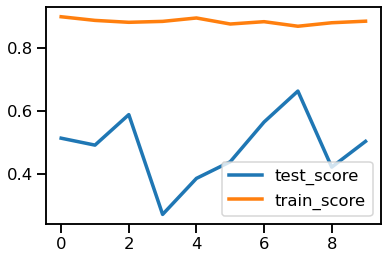

In [15]:
cv_results[['test_score', 'train_score']].plot()

c) The model clearly overfits 

## Question 7 

We will now study the effect of the parameter n_neighbors on the train and test score using a validation curve. You can use the following parameter range:

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

Also, use a 5-fold cross-validation and compute the balanced accuracy score instead of the default accuracy score (check the scoring parameter). Finally, plot the average train and test scores for the different value of the hyperparameter. We recall that the name of the parameter can be found using model.get_params().

Select the true affirmations stated below:

Text(0.5, 1.0, 'Validation curve')

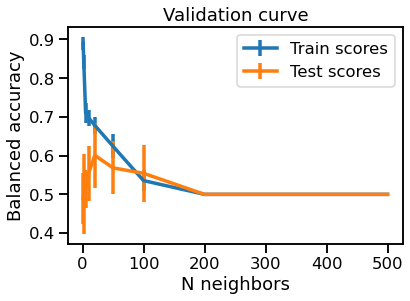

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(model, data, target, 
                                             param_name = 'kneighborsclassifier__n_neighbors',
                                             param_range = param_range,
                                             cv = 5,
                                             scoring = 'balanced_accuracy')


plt.errorbar(param_range,
             train_scores.mean(axis=1),
             train_scores.std(axis=1),
             label = 'Train scores'
            )

plt.errorbar(param_range,
             test_scores.mean(axis=1),
             test_scores.std(axis=1),
             label = 'Test scores')

plt.legend()
plt.xlabel('N neighbors')
plt.ylabel('Balanced accuracy')
plt.title('Validation curve')


In [17]:
pd.concat([
           pd.DataFrame(train_scores.mean(axis=1),param_range, columns=['Train score']),
           pd.DataFrame(test_scores.mean(axis=1),param_range, columns = ['Test score'])
          ], axis=1)

,Train score,Test score
1,0.889903,0.489612
2,0.841787,0.500664
5,0.710427,0.514641
10,0.697481,0.554286
20,0.678223,0.600789
50,0.624069,0.568363
100,0.535553,0.554369
200,0.500000,0.500000
500,0.500000,0.500000


c) The model underfits for a range of n_neighbors values between 100 to 500 

a) The model overfits for a range of n_neighbors values between 1 to 10 a) The model overfits for a range of <code>n_neighbors</code> values between 1 to 10 
 
b) The model best generalizes for a range of n_neighbors values between 10 to 100 